# Proyecto del Día 14 - Gestión Segura de Datos de Clientes

Este notebook implementa un sistema básico de gestión y análisis de datos de clientes, aplicando técnicas de pseudonimización, anonimización y balanceo de datos.


## Objetivo
El proyecto consiste en desarrollar un sistema de gestión y análisis de datos de clientes que implemente técnicas de pseudonimización, anonimización y balanceo de datos para proteger la privacidad de los usuarios y asegurar un análisis equitativo.


## Consignas del Proyecto
1. Cargar los datos de clientes provistos en un archivo CSV.
2. Aplicar técnicas de anonimización al campo `direccion`, `edad` y `salario` para proteger la identidad de los clientes.
3. Aplicar técnicas de pseudonimización al campo `nombre`.
4. Implementar una función de balanceo de datos para asegurar la representación equitativa de diversas categorías en el análisis posterior.
5. Realizar un análisis simple de los datos para identificar tendencias o patrones que podrían ser útiles para decisiones de negocios o marketing.


Este proyecto te permitirá aplicar prácticas esenciales de privacidad de datos y técnicas de manipulación de datos en un entorno práctico, preparándote para desafíos similares en entornos profesionales.

¡Mucha suerte y que te diviertas!

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import uuid #!crea identificadores unicos
import hashlib
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_data = pd.read_csv('clientes.csv')
df_data.head()

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,62,0,61050
1,James Jones,729 Neruda,65,1,53824
2,Patricia Wilson,935 Dickinson,18,0,60281
3,Elizabeth Robinson,459 Rilke,21,1,42187
4,Charles Brown,823 Ginsberg,21,1,37589


In [11]:
ruido = np.random.normal(0,100, size=df_data['salario'].shape)

In [12]:
df_data['salario'] += ruido
df_data.head()

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,62,0,60917.055936
1,James Jones,729 Neruda,65,1,54081.855893
2,Patricia Wilson,935 Dickinson,18,0,60272.131768
3,Elizabeth Robinson,459 Rilke,21,1,42156.572332
4,Charles Brown,823 Ginsberg,21,1,37670.216675


In [13]:
df_data.drop('direccion', axis=1, inplace=True)
df_data

,nombre,edad,categoria,salario
0,Richard Martin,62,0,60917.055936
1,James Jones,65,1,54081.855893
2,Patricia Wilson,18,0,60272.131768
3,Elizabeth Robinson,21,1,42156.572332
4,Charles Brown,21,1,37670.216675
...,...,...,...,...
195,Barbara Jones,47,0,51929.764954
196,Richard Brown,39,1,47702.747086
197,Mary Garcia,64,1,45352.035455
198,James Wilson,43,1,46785.005233


In [14]:
df_data['edad'] = (df_data['edad'] // 10) * 10  # Agrupar edades por decenas
df_data.head()

,nombre,edad,categoria,salario
0,Richard Martin,60,0,60917.055936
1,James Jones,60,1,54081.855893
2,Patricia Wilson,10,0,60272.131768
3,Elizabeth Robinson,20,1,42156.572332
4,Charles Brown,20,1,37670.216675


In [15]:
id_pseudo = []
for i in range(len(df_data)):
    id_pseudo.append(uuid.uuid4().hex)
df_data['id_pseudo'] = id_pseudo
df_data.drop('nombre', axis=1, inplace=True)
df_data.head()

,edad,categoria,salario,id_pseudo
0,60,0,60917.055936,a0007acb459a4a03854ff1d5a190eb58
1,60,1,54081.855893,6147be940ffd4b059d44d8e9b3c1a75f
2,10,0,60272.131768,647a3d48f3e340ceb3d038b77491e6af
3,20,1,42156.572332,4a16a06f610842b591375d1e781e90c4
4,20,1,37670.216675,9999c83402254b069516028fccf1c135


In [16]:
agrupado = df_data.groupby('categoria')
data_balanceada = pd.DataFrame()
for nombre, grupo in agrupado:
    grupo_balanceado = resample(grupo, 
                                replace=True,
                                n_samples=10,
                                random_state=123)
    data_balanceada = pd.concat([data_balanceada, grupo_balanceado])
data_balanceada

,edad,categoria,salario,id_pseudo
158,50,0,41490.542737,0dc91d6fff76488abf44ff14bab26bda
42,30,0,59388.393096,a55772ddb10945b7946b66ec3b76a31c
194,40,0,49768.220803,4011e3a8bf244a27ad0dced8e84e4630
133,50,0,41922.990105,8f9e132be7e946adb472f2665b18cc26
114,60,0,53334.864828,fd37979db706450ab791742f924c0e0f
177,40,0,52007.800183,e3359566d13a4d629d5697f984cee00a
83,30,0,46048.447751,530891926e2a43808fde003f7f9ac12b
113,60,0,68256.776171,249134bdf14a4b6db47b2101431411bf
56,40,0,51747.727218,5daec382b82041bb95626b4d1bfd6832
194,40,0,49768.220803,4011e3a8bf244a27ad0dced8e84e4630


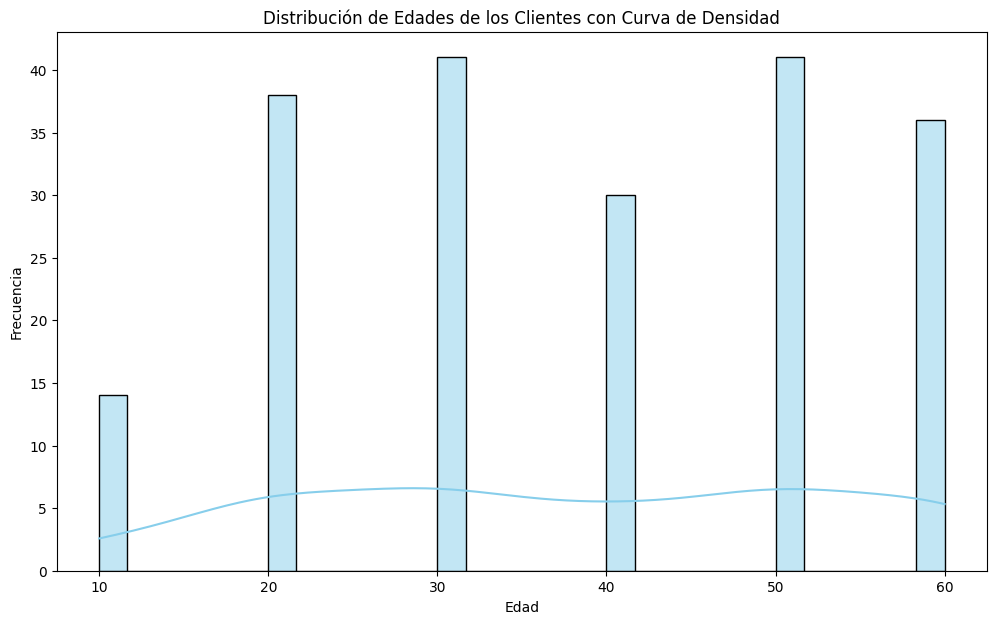

In [17]:
# Visualización 1: Distribución de las edades con curva de densidad
plt.figure(figsize=(12, 7))
ax = sns.histplot(df_data['edad'],
                  kde=True,
                  color='skyblue',
                  bins=30)
ax.set(title='Distribución de Edades de los Clientes con Curva de Densidad',
       xlabel='Edad',
       ylabel='Frecuencia');

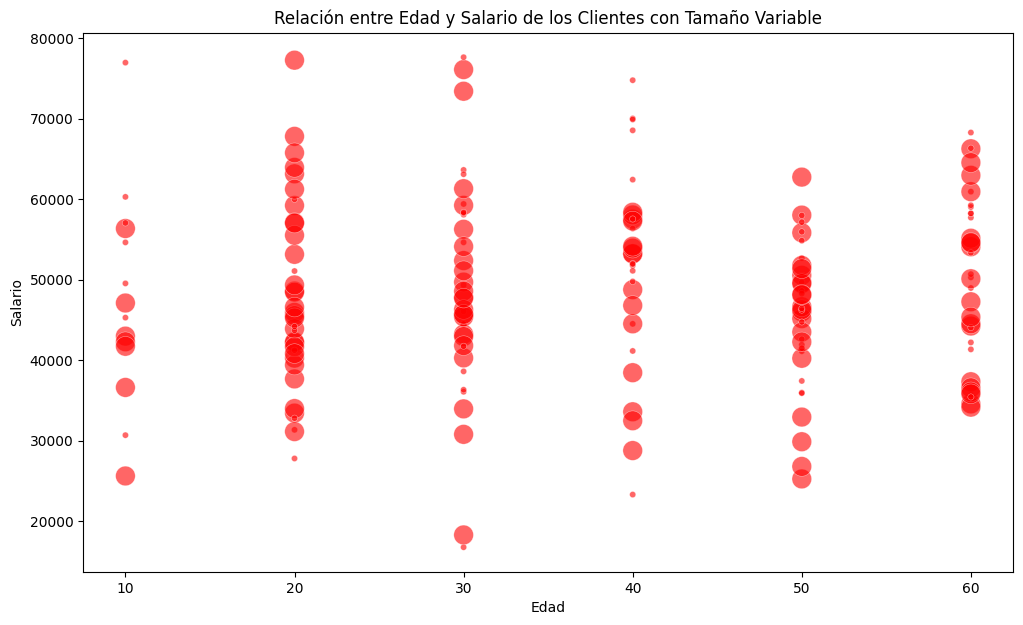

In [18]:
# Visualización 2: Relación entre Edad y Salario con tamaño variable
plt.figure(figsize=(12, 7))
sizes = df_data['categoria'].replace({0: 50, 1: 100})  # Asignar tamaño según categoría para ilustrar
scatter = sns.scatterplot(x='edad',
                          y='salario',
                          size=sizes,
                          legend=False,
                          sizes=(20, 200),
                          data=df_data,
                          color='red',
                          alpha=0.6)
scatter.set(title='Relación entre Edad y Salario de los Clientes con Tamaño Variable',
            xlabel='Edad',
            ylabel='Salario');

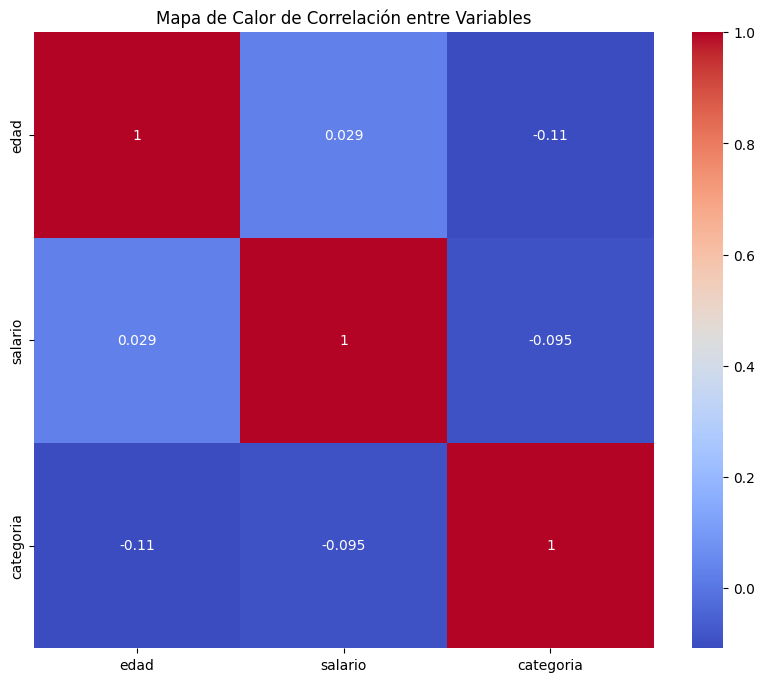

In [20]:
# Visualización 3: Mapa de Calor de Correlación entre Variables
plt.figure(figsize=(10, 8))
# Calculamos la matriz de correlación
correlation_matrix = df_data[['edad', 'salario', 'categoria']].corr()
heatmap = sns.heatmap(correlation_matrix,
                      annot=True,
                      cmap='coolwarm')
heatmap.set(title='Mapa de Calor de Correlación entre Variables');